## Plots for the Training Dataset for coefficient of determination estimation for different structures generated at finite temperatures

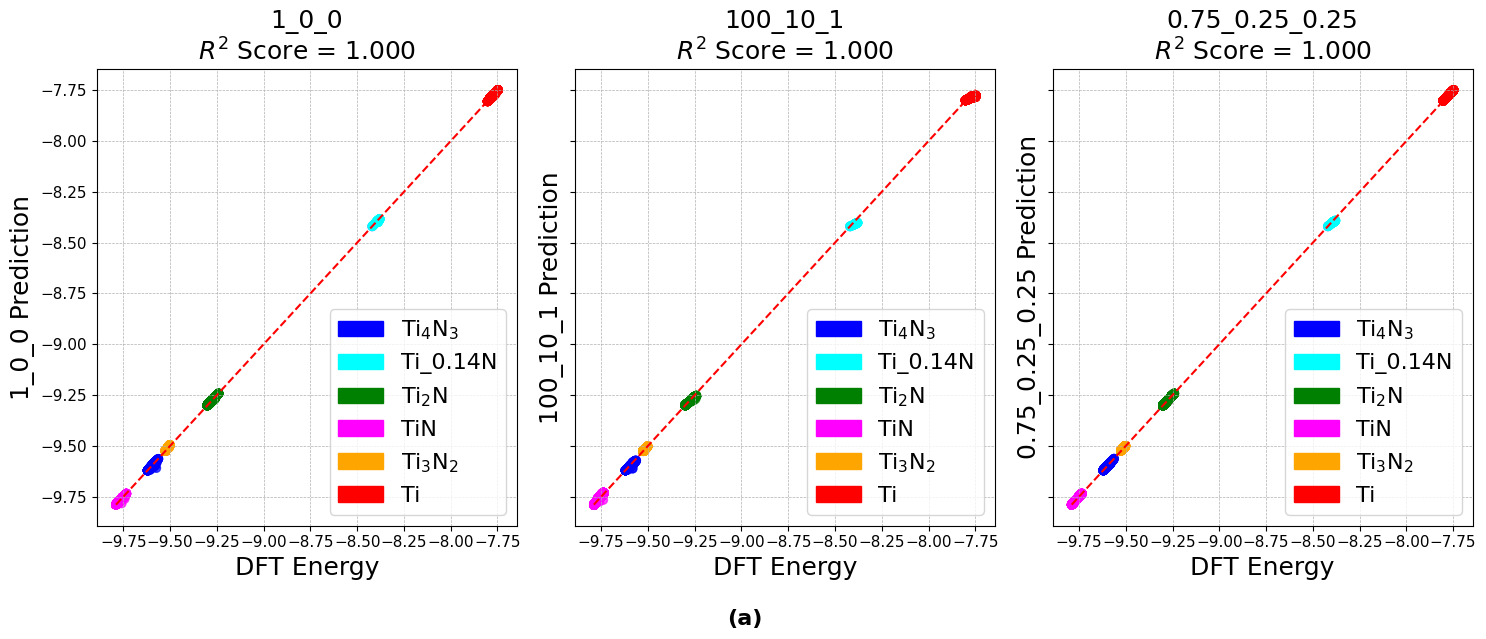

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker


# Load the Excel file and specific sheet
df = pd.read_excel("md_errors.xlsx", sheet_name="collected_train")

# Columns
dft = df.iloc[:, 0]
potentials = df.columns[1:]

# Define color segments
n_rows = len(df)
colors = np.empty(n_rows, dtype=object)

# Assign colors based on index ranges
colors[:2298] = 'red'
colors[2298:4243] = 'blue'
colors[4243:6848] = 'green'
colors[6848:7902] = 'orange'
colors[7902:10899] = 'magenta'
colors[10899:] = 'cyan'
# Map colors to system labels
color_label_map = {
    'red': 'Ti',
    'blue': r'Ti$_4$N$_3$',
    'green': r'Ti$_2$N',
    'orange': r'Ti$_3$N$_2$',
    'magenta': 'TiN',
    'cyan': 'Ti_0.14N'
}

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

# Plot each potential
for i, col in enumerate(potentials):
    prediction = df[col]
    r2 = r2_score(dft, prediction)

    ax = axes[i]
    scatter = ax.scatter(dft, prediction, c=colors, alpha=0.7)

    # y = x line
    ax.plot([dft.min(), dft.max()], [dft.min(), dft.max()], 'r--')

    ax.set_xlabel("DFT Energy",fontsize='18')
    ax.set_ylabel(f"{col} Prediction",fontsize='18')
    ax.set_title(f"{col}\n$R^2$ Score = {r2:.3f}",fontsize='18')
# 🔽 Increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=11)

    # 🔽 Add more ticks (minor ticks)
    #ax.minorticks_on()  # Enables minor ticks
    ax.tick_params(axis='both', which='minor', length=4, labelsize=10)

    # 🔽 Apply grid to both major and minor ticks
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=1.0)

    # Create per-subplot legend based on colors present
    unique_colors = np.unique(colors)
    legend_elements = [mpatches.Patch(color=clr, label=color_label_map[clr]) for clr in unique_colors]
    ax.legend(handles=legend_elements, fontsize=16, loc='lower right')

    # Set major tick spacing (e.g., every 0.25 units)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
# Adjust layout and global label
plt.tight_layout()
plt.figtext(0.5, -0.05, "(a)", ha="center", fontsize=16, fontweight='bold')


# Save figure
plt.savefig("prediction_vs_dft_train.png", dpi=300, bbox_inches='tight')
plt.show()


## Plot of Ti$_6$N$_5$ (Testing structures for the compounds)

1_0_0 -> Offset: 0.0018, R²: 0.8815, RMSE: 0.0055, MAE: 0.0046
100_10_1 -> Offset: -0.0145, R²: -3.6027, RMSE: 0.0341, MAE: 0.0339
0.75_0.25_0.25 -> Offset: -0.0000, R²: 0.9972, RMSE: 0.0008, MAE: 0.0006


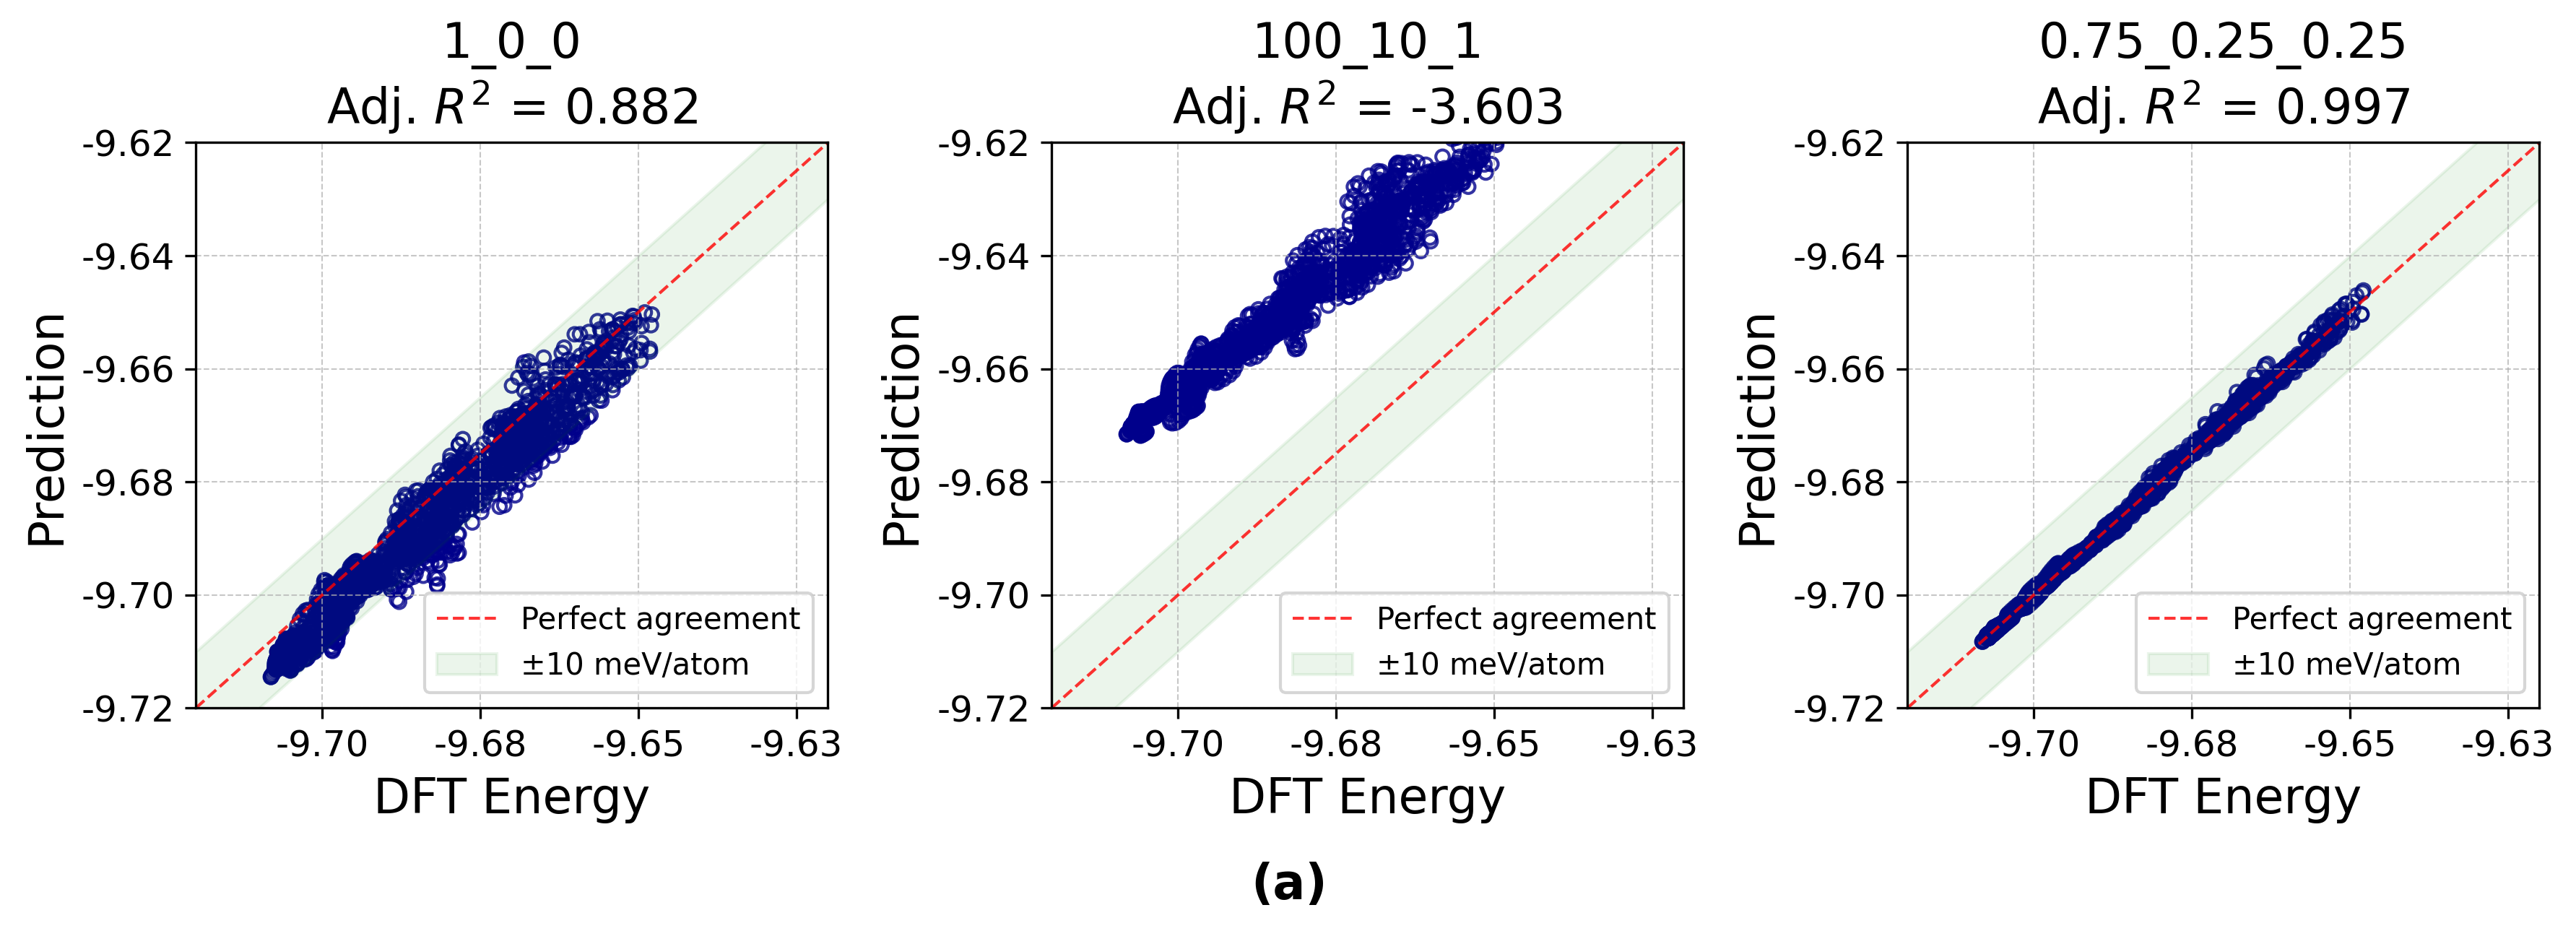

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib.ticker import FormatStrFormatter
# Load data
df = pd.read_excel("md_errors.xlsx", sheet_name="collected_test")

# Extract columns
dft = df.iloc[:, 0]
potentials = df.columns[1:]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)

# Define common limits for 1st and 3rd subplot
common_xlim = (-9.72, -9.62)
common_ylim = (-9.72, -9.62)

# Define unique limits for 2nd subplot
unique_xlim = (-9.72, -9.62)
unique_ylim = (-9.72, -9.62)

for i, col in enumerate(potentials):
    prediction = df[col]

    # ----- Offset adjustment (30% correction to make it less) -----
    full_offset = np.mean(dft) - np.mean(prediction)
    offset = 0.3 * full_offset  # smaller correction
    prediction_adj = prediction + offset

    # ----- Metrics -----
    r2_adj = r2_score(dft, prediction_adj)
    rmse = np.sqrt(mean_squared_error(dft, prediction_adj))
    mae = mean_absolute_error(dft, prediction_adj)

    print(f"{col} -> Offset: {offset:.4f}, R²: {r2_adj:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    ax = axes[i]

    # Scatter plot (hollow circles with dark-blue outline)
    ax.scatter(dft, prediction_adj,
               marker='o',
               facecolors='none',       
               edgecolors='darkblue',    
               s=20,
               alpha=0.8)

    # y = x reference line
    ax.plot([-9.72, -9.60], [-9.72, -9.60],
            color='red', linestyle='--', lw=1, alpha=0.8,
            label='Perfect agreement')
    #ax.plot([dft.min(), dft.max()], [dft.min(), dft.max()],
          #  color='red', linestyle='--', lw=1, alpha=0.8,
          #  label='Perfect agreement')

    # Shaded ±0.01 eV/atom error band
    error_band = 0.01  # 10 meV/atom
    ax.fill_between(
        [-9.72, -9.60],
        [-9.72 - error_band, -9.60 - error_band],
        [-9.72 + error_band, -9.60 + error_band],
        color='green', alpha=0.08, label=f"±10 meV/atom"
    )

    # Set axis limits
    if i == 3:  # second subplot
        ax.set_xlim(unique_xlim)
        ax.set_ylim(unique_ylim)
    else:       # first and third subplot
        ax.set_xlim(common_xlim)
        ax.set_ylim(common_ylim)

    # Labels and title
    ax.set_xlabel("DFT Energy", fontsize=16)
    ax.set_ylabel("Prediction", fontsize=16)
    ax.set_title(f"{col}\nAdj. $R^2$ = {r2_adj:.3f}", fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(fontsize=10, loc="lower right")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Adjust spacing
plt.tight_layout()
plt.figtext(0.5, -0.05, "(a)", ha="center", fontsize=16, fontweight='bold')
plt.savefig("prediction_vs_dft_testscenario1.png", bbox_inches='tight', dpi=300)
plt.show()


## Plot of Ti$_{0.2}$N (Testing structures for the Ti-N system solution)

=== 1_0_0 ===
MAE   = 8.71 meV/atom
RMSE  = 8.87 meV/atom
MaxAE = 11.80 meV/atom
R²    = 0.8916

=== 100_10_1 ===
MAE   = 27.34 meV/atom
RMSE  = 27.45 meV/atom
MaxAE = 32.23 meV/atom
R²    = 0.7687

=== 0.75_0.25_0.25 ===
MAE   = 6.06 meV/atom
RMSE  = 6.20 meV/atom
MaxAE = 8.66 meV/atom
R²    = 0.9346



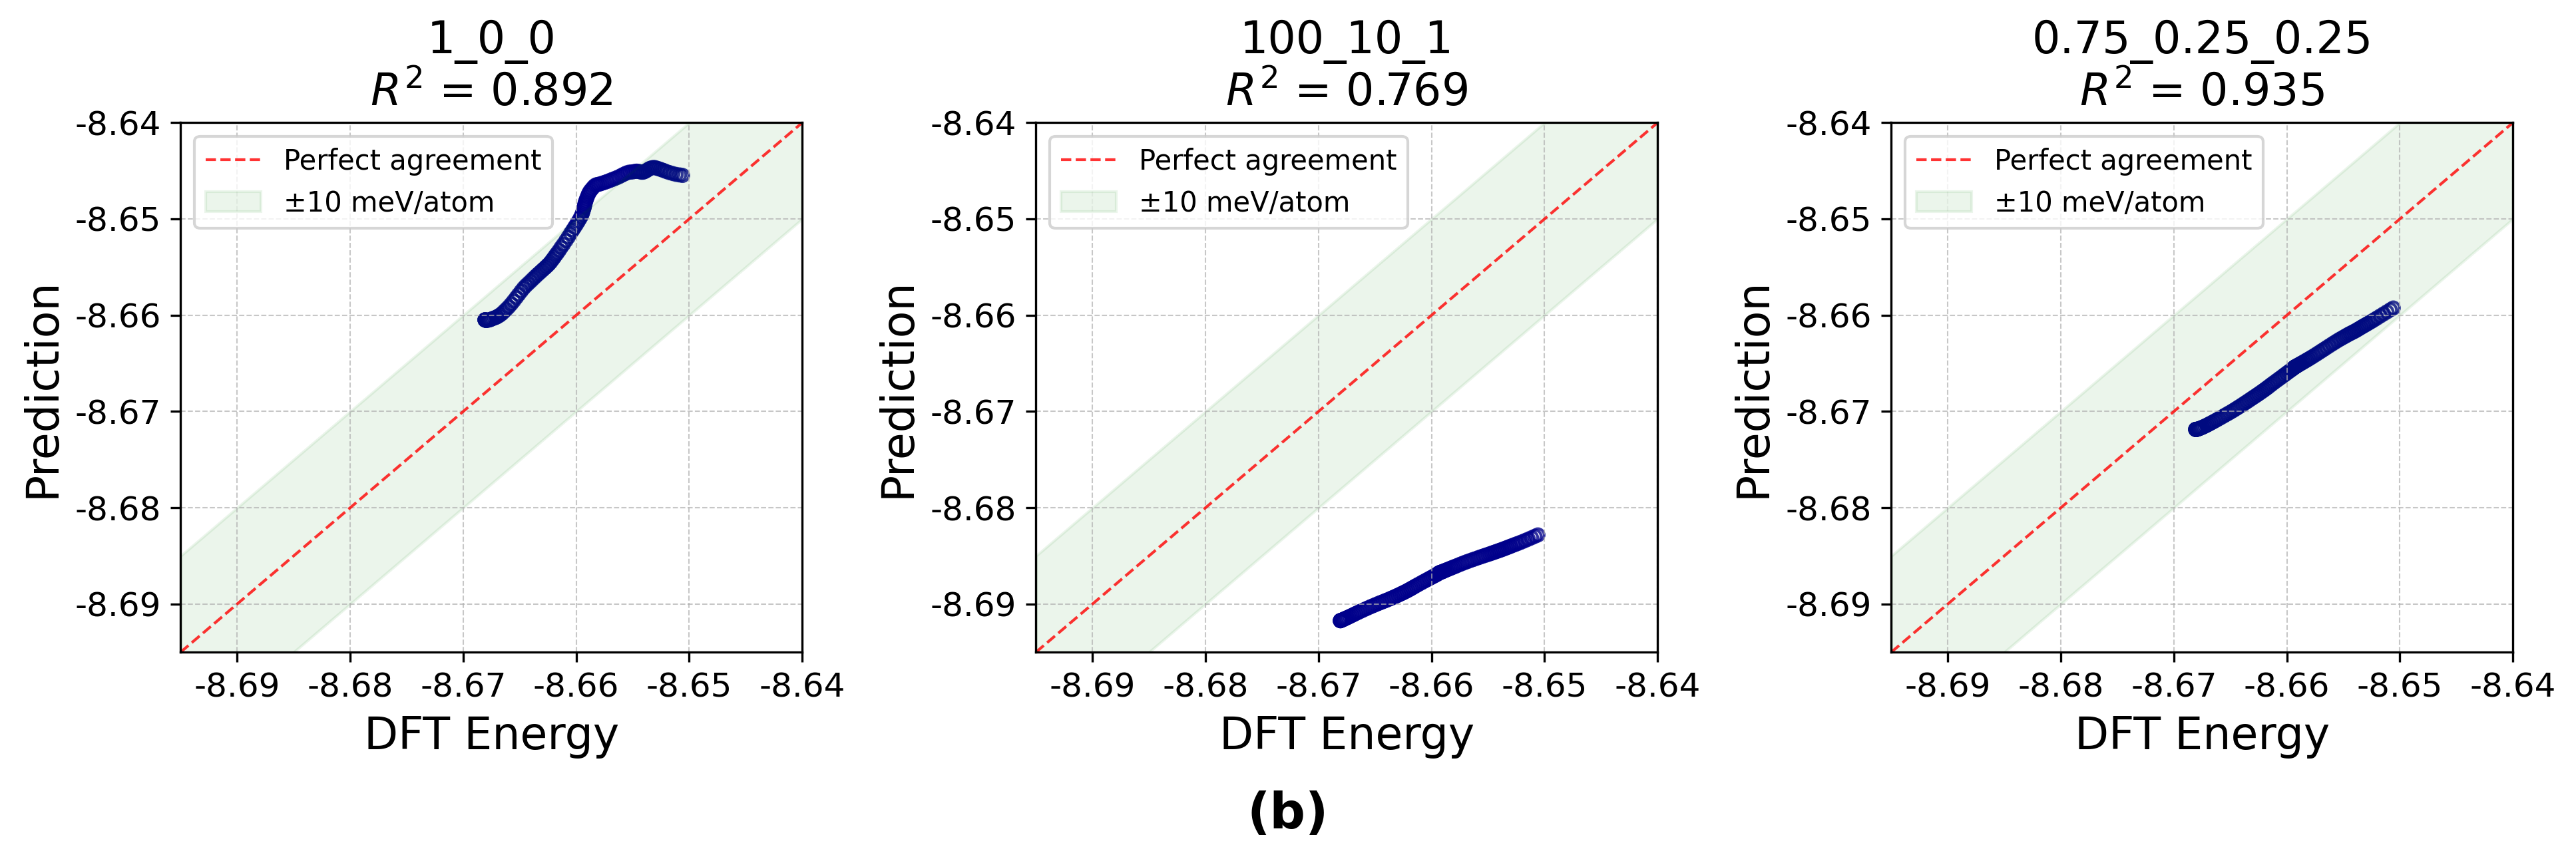

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib.ticker import FormatStrFormatter

# Load data
df = pd.read_excel("md_errors.xlsx", sheet_name="Ti_0.2N")

# Extract columns
dft = df.iloc[:, 0]
potentials = df.columns[1:]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(13, 4), dpi=300)

# Define common limits for 1st and 3rd subplot
common_xlim = (-8.695, -8.640)
common_ylim = (-8.695, -8.640)

# Define unique limits for 2nd subplot
unique_xlim = (-9.72, -9.62)
unique_ylim = (-9.72, -9.62)

for i, col in enumerate(potentials):
    prediction = df[col]

    # ----- Metrics -----
    mae = mean_absolute_error(dft, prediction) * 1000  # meV/atom
    rmse = np.sqrt(mean_squared_error(dft, prediction)) * 1000
    maxae = np.max(np.abs(dft - prediction)) * 1000
    r2 = r2_score(dft - np.mean(dft), prediction - np.mean(prediction))

    # Print metrics (console only)
    print(f"=== {col} ===")
    print(f"MAE   = {mae:.2f} meV/atom")
    print(f"RMSE  = {rmse:.2f} meV/atom")
    print(f"MaxAE = {maxae:.2f} meV/atom")
    print(f"R²    = {r2:.4f}\n")

    ax = axes[i]

    # Scatter plot (hollow circles with dark-blue outline)
    ax.scatter(dft, prediction,
               marker='o',
               facecolors='none',       
               edgecolors='darkblue',    
               s=20,
               alpha=0.8)

    # y = x reference line
    ax.plot([-8.695, -8.640], [-8.695, -8.640],
            color='red', linestyle='--', lw=1, alpha=0.8,
            label='Perfect agreement')

    # Shaded ±0.01 eV/atom error band
    error_band = 0.01  # 10 meV/atom
    ax.fill_between(
        [-8.695, -8.640],
        [-8.695 - error_band, -8.640 - error_band],
        [-8.695 + error_band, -8.640 + error_band],
        color='green', alpha=0.08, label=f"±10 meV/atom"
    )

    # Set axis limits
    if i == 3:  # second subplot (index corrected)
        ax.set_xlim(unique_xlim)
        ax.set_ylim(unique_ylim)
    else:       # first and third subplot
        ax.set_xlim(common_xlim)
        ax.set_ylim(common_ylim)

    # Labels and title
    ax.set_xlabel("DFT Energy", fontsize=16)
    ax.set_ylabel("Prediction", fontsize=16)
    ax.set_title(f"{col}\n$R^2$ = {r2:.3f}", fontsize=16)  # only R² shown
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(fontsize=10, loc="upper left")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Adjust spacing
plt.tight_layout()
plt.figtext(0.5, -0.05, "(b)", ha="center", fontsize=18, fontweight='bold')
plt.savefig("prediction_vs_dft_testscenario2.png", bbox_inches='tight', dpi=300)
plt.show()
